# Training the model

<br>

#### Necessary imports for keras

***

In [1]:
# Neural networks.
import tensorflow.keras as kr

# Numerical arrays.
import numpy as np

# Data frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Nicer plots.
import seaborn as sns

import sklearn.model_selection as skms

In [2]:
# Data set
df = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

X = df['speed']
y = df['power']

print(df)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


Text(0, 0.5, 'Power')

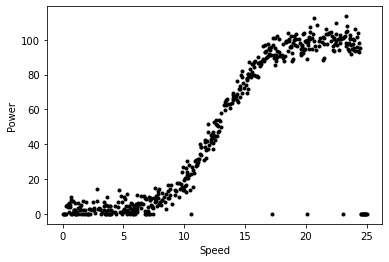

In [3]:
# Plotting data set.
plt.plot(X, y, 'k.')
plt.xlabel("Speed")
plt.ylabel("Power")

<br>
After plotting the data set we can determine that the function used to get power from the speed is sigmoid. The reasoning behind this is due to the shape of the graph.  The difference in this situation is that the values are all positive instead of beginning both negative and positive.
<br>

***

##### Sigmoid Graph Example


<img style="float: left;" src="https://hvidberrrg.github.io/deep_learning/activation_functions/assets/sigmoid_function.png" width="500" height="500">

In [4]:
# Printing outliers
outliers = df[X > 10][y == 0.000]
print(outliers)

      speed  power
208  10.511    0.0
340  17.167    0.0
404  20.095    0.0
456  22.998    0.0
490  24.499    0.0
491  24.525    0.0
492  24.575    0.0
493  24.650    0.0
494  24.750    0.0
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


<ipython-input-4-6d17a4e2b3fb>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[X > 10][y == 0.000]


In [5]:
df = df.drop([208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499])

In [6]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values
X = X.reshape(-1,1)

Text(0, 0.5, 'Power')

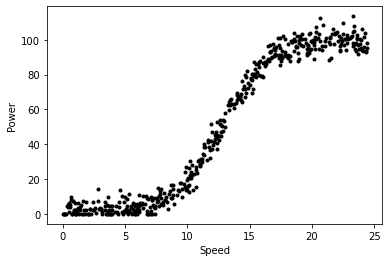

In [7]:
# Plotting data set.
plt.plot(X, y, 'k.')
plt.xlabel("Speed")
plt.ylabel("Power")

In [8]:
df.describe()

,speed,power
count,486.000000,486.000000
mean,12.298311,49.397720
std,7.084043,41.391996
min,0.000000,0.000000
25%,6.137250,5.868250
50%,12.349500,44.773000
75%,18.386750,93.751250
max,24.399000,113.556000


In [10]:
# Getting the test data set.
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.2, random_state=0)

<br>
https://keras.io/api/models/model/
<br>

In [11]:
# Create a neural network with one neuron.
model = kr.models.Sequential()

inputLayer = kr.Input(shape=(1,))
hiddenLayer1 = kr.layers.Dense(50, activation="sigmoid")(inputLayer)
hiddenLayer2 = kr.layers.Dense(50, activation="sigmoid")(hiddenLayer1)
hiddenLayer3 = kr.layers.Dense(30, activation="sigmoid")(hiddenLayer2)
outputs = kr.layers.Dense(1,)(hiddenLayer3)
model = kr.Model(inputLayer, outputs=outputs)

#model.add(kr.layers.Dense(3, activation="sigmoid", kernel_initializer='ones', bias_initializer='zeros'))
model.compile('adam', loss='mean_squared_error')

In [12]:
# Train the neural network on our df data
model.fit(X, y, epochs=500)

Epoch 1/500
16/16 [==============================] - 0s 2ms/step - loss: 4112.5679
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 4029.2085
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 3948.2205
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 3874.3491
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 3813.9827
Epoch 6/500
16/16 [==============================] - 0s 2ms/step - loss: 3765.7454
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 3725.1296
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 3687.9993
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 3649.6436
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 3612.4377
Epoch 11/500
16/16 [==============================] - 0s 2ms/step - loss: 3574.6787
Epoch 12/500
16/16 [==============================] - 0s 2ms/step - loss: 3537.8958
E

16/16 [==============================] - 0s 2ms/step - loss: 2045.6493
Epoch 98/500
16/16 [==============================] - 0s 2ms/step - loss: 2037.2847
Epoch 99/500
16/16 [==============================] - 0s 1ms/step - loss: 2029.8073
Epoch 100/500
16/16 [==============================] - 0s 2ms/step - loss: 2022.1982
Epoch 101/500
16/16 [==============================] - 0s 2ms/step - loss: 2014.2623
Epoch 102/500
16/16 [==============================] - 0s 2ms/step - loss: 2006.7760
Epoch 103/500
16/16 [==============================] - 0s 2ms/step - loss: 1998.5818
Epoch 104/500
16/16 [==============================] - 0s 2ms/step - loss: 1991.6559
Epoch 105/500
16/16 [==============================] - 0s 3ms/step - loss: 1984.8572
Epoch 106/500
16/16 [==============================] - ETA: 0s - loss: 2059.59 - 0s 3ms/step - loss: 1977.6421
Epoch 107/500
16/16 [==============================] - 0s 2ms/step - loss: 1971.3695
Epoch 108/500
16/16 [==============================] - 

16/16 [==============================] - 0s 2ms/step - loss: 884.5274
Epoch 194/500
16/16 [==============================] - 0s 1ms/step - loss: 870.3106
Epoch 195/500
16/16 [==============================] - 0s 2ms/step - loss: 855.6879
Epoch 196/500
16/16 [==============================] - 0s 1ms/step - loss: 841.8593
Epoch 197/500
16/16 [==============================] - 0s 2ms/step - loss: 828.0308
Epoch 198/500
16/16 [==============================] - 0s 2ms/step - loss: 814.6798
Epoch 199/500
16/16 [==============================] - 0s 2ms/step - loss: 801.7139
Epoch 200/500
16/16 [==============================] - 0s 1ms/step - loss: 788.9475
Epoch 201/500
16/16 [==============================] - 0s 2ms/step - loss: 776.5377
Epoch 202/500
16/16 [==============================] - 0s 1ms/step - loss: 763.9915
Epoch 203/500
16/16 [==============================] - 0s 2ms/step - loss: 752.5762
Epoch 204/500
16/16 [==============================] - 0s 1ms/step - loss: 740.5829
Epoch 

16/16 [==============================] - 0s 2ms/step - loss: 185.8860
Epoch 291/500
16/16 [==============================] - 0s 2ms/step - loss: 182.7242
Epoch 292/500
16/16 [==============================] - 0s 1ms/step - loss: 179.8212
Epoch 293/500
16/16 [==============================] - 0s 2ms/step - loss: 176.6213
Epoch 294/500
16/16 [==============================] - 0s 1ms/step - loss: 173.5328
Epoch 295/500
16/16 [==============================] - 0s 2ms/step - loss: 170.6819
Epoch 296/500
16/16 [==============================] - 0s 2ms/step - loss: 168.3722
Epoch 297/500
16/16 [==============================] - 0s 2ms/step - loss: 165.1302
Epoch 298/500
16/16 [==============================] - 0s 1ms/step - loss: 162.3481
Epoch 299/500
16/16 [==============================] - 0s 2ms/step - loss: 159.4389
Epoch 300/500
16/16 [==============================] - ETA: 0s - loss: 142.401 - 0s 2ms/step - loss: 156.6590
Epoch 301/500
16/16 [==============================] - 0s 2ms/st

16/16 [==============================] - 0s 2ms/step - loss: 36.3858
Epoch 387/500
16/16 [==============================] - 0s 2ms/step - loss: 35.8946
Epoch 388/500
16/16 [==============================] - 0s 2ms/step - loss: 34.9483
Epoch 389/500
16/16 [==============================] - 0s 2ms/step - loss: 34.5243
Epoch 390/500
16/16 [==============================] - 0s 2ms/step - loss: 33.5834
Epoch 391/500
16/16 [==============================] - 0s 2ms/step - loss: 33.2940
Epoch 392/500
16/16 [==============================] - 0s 1ms/step - loss: 33.7614
Epoch 393/500
16/16 [==============================] - 0s 2ms/step - loss: 32.2265
Epoch 394/500
16/16 [==============================] - 0s 2ms/step - loss: 31.8555
Epoch 395/500
16/16 [==============================] - 0s 2ms/step - loss: 31.7919
Epoch 396/500
16/16 [==============================] - 0s 3ms/step - loss: 31.9735
Epoch 397/500
16/16 [==============================] - 0s 2ms/step - loss: 30.3977
Epoch 398/500
16/1

16/16 [==============================] - 0s 1ms/step - loss: 17.4447
Epoch 485/500
16/16 [==============================] - 0s 2ms/step - loss: 17.7895
Epoch 486/500
16/16 [==============================] - 0s 2ms/step - loss: 17.3605
Epoch 487/500
16/16 [==============================] - 0s 3ms/step - loss: 17.4005
Epoch 488/500
16/16 [==============================] - 0s 2ms/step - loss: 17.5996
Epoch 489/500
16/16 [==============================] - 0s 2ms/step - loss: 17.6061
Epoch 490/500
16/16 [==============================] - 0s 2ms/step - loss: 17.4696
Epoch 491/500
16/16 [==============================] - 0s 2ms/step - loss: 17.7051
Epoch 492/500
16/16 [==============================] - 0s 2ms/step - loss: 17.4534
Epoch 493/500
16/16 [==============================] - 0s 2ms/step - loss: 17.1212
Epoch 494/500
16/16 [==============================] - 0s 1ms/step - loss: 17.2492
Epoch 495/500
16/16 [==============================] - 0s 2ms/step - loss: 17.4867
Epoch 496/500
16/1

In [13]:
# Take five hand-picked values and see their predictions.
model.predict([1.0,3.0,10.0,50.0,75.0])

array([[ 2.7105238],
       [ 3.0089357],
       [19.614336 ],
       [97.73962  ],
       [97.739655 ]], dtype=float32)

In [15]:
# Train the neural network on our test data set
model.fit(X_test, y_test, epochs=500)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 17.3737
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 18.0622
Epoch 3/500
4/4 [==============================] - 0s 2ms/step - loss: 16.9251
Epoch 4/500
4/4 [==============================] - 0s 1ms/step - loss: 17.4006
Epoch 5/500
4/4 [==============================] - 0s 3ms/step - loss: 16.8354
Epoch 6/500
4/4 [==============================] - 0s 2ms/step - loss: 18.1796
Epoch 7/500
4/4 [==============================] - 0s 7ms/step - loss: 18.0810
Epoch 8/500
4/4 [==============================] - 0s 3ms/step - loss: 24.6899
Epoch 9/500
4/4 [==============================] - 0s 1ms/step - loss: 19.9521
Epoch 10/500
4/4 [==============================] - 0s 2ms/step - loss: 19.3036
Epoch 11/500
4/4 [==============================] - 0s 2ms/step - loss: 22.0311
Epoch 12/500
4/4 [==============================] - 0s 3ms/step - loss: 17.1289
Epoch 13/500
4/4 [==============================]

4/4 [==============================] - 0s 1ms/step - loss: 16.4708
Epoch 103/500
4/4 [==============================] - 0s 2ms/step - loss: 15.8459
Epoch 104/500
4/4 [==============================] - 0s 1ms/step - loss: 15.4729
Epoch 105/500
4/4 [==============================] - 0s 2ms/step - loss: 15.9157
Epoch 106/500
4/4 [==============================] - 0s 3ms/step - loss: 16.0041
Epoch 107/500
4/4 [==============================] - 0s 2ms/step - loss: 15.4000
Epoch 108/500
4/4 [==============================] - 0s 2ms/step - loss: 15.3612
Epoch 109/500
4/4 [==============================] - 0s 3ms/step - loss: 16.2147
Epoch 110/500
4/4 [==============================] - 0s 3ms/step - loss: 16.0071
Epoch 111/500
4/4 [==============================] - 0s 2ms/step - loss: 15.9441
Epoch 112/500
4/4 [==============================] - 0s 2ms/step - loss: 16.2693
Epoch 113/500
4/4 [==============================] - 0s 2ms/step - loss: 15.7373
Epoch 114/500
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 15.2972
Epoch 204/500
4/4 [==============================] - 0s 2ms/step - loss: 15.2701
Epoch 205/500
4/4 [==============================] - 0s 2ms/step - loss: 15.3255
Epoch 206/500
4/4 [==============================] - 0s 2ms/step - loss: 15.5674
Epoch 207/500
4/4 [==============================] - 0s 4ms/step - loss: 15.6004
Epoch 208/500
4/4 [==============================] - 0s 3ms/step - loss: 15.7834
Epoch 209/500
4/4 [==============================] - 0s 2ms/step - loss: 16.5155
Epoch 210/500
4/4 [==============================] - 0s 2ms/step - loss: 15.6501
Epoch 211/500
4/4 [==============================] - 0s 1ms/step - loss: 15.2225
Epoch 212/500
4/4 [==============================] - 0s 2ms/step - loss: 15.5979
Epoch 213/500
4/4 [==============================] - 0s 2ms/step - loss: 16.0172
Epoch 214/500
4/4 [==============================] - 0s 2ms/step - loss: 15.7007
Epoch 215/500
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 15.0056
Epoch 304/500
4/4 [==============================] - 0s 2ms/step - loss: 15.5794
Epoch 305/500
4/4 [==============================] - 0s 3ms/step - loss: 15.3024
Epoch 306/500
4/4 [==============================] - 0s 1ms/step - loss: 14.9725
Epoch 307/500
4/4 [==============================] - 0s 2ms/step - loss: 15.0595
Epoch 308/500
4/4 [==============================] - 0s 3ms/step - loss: 16.0571
Epoch 309/500
4/4 [==============================] - 0s 3ms/step - loss: 15.3046
Epoch 310/500
4/4 [==============================] - 0s 1ms/step - loss: 15.6628
Epoch 311/500
4/4 [==============================] - 0s 2ms/step - loss: 14.8878
Epoch 312/500
4/4 [==============================] - 0s 1ms/step - loss: 17.4151
Epoch 313/500
4/4 [==============================] - 0s 3ms/step - loss: 17.5808
Epoch 314/500
4/4 [==============================] - 0s 2ms/step - loss: 15.2668
Epoch 315/500
4/4 [=======================

4/4 [==============================] - 0s 2ms/step - loss: 15.1093
Epoch 404/500
4/4 [==============================] - 0s 2ms/step - loss: 16.5681
Epoch 405/500
4/4 [==============================] - 0s 1ms/step - loss: 16.8933
Epoch 406/500
4/4 [==============================] - 0s 2ms/step - loss: 15.1723
Epoch 407/500
4/4 [==============================] - 0s 2ms/step - loss: 15.3310
Epoch 408/500
4/4 [==============================] - 0s 2ms/step - loss: 17.1636
Epoch 409/500
4/4 [==============================] - 0s 3ms/step - loss: 16.5917
Epoch 410/500
4/4 [==============================] - 0s 1ms/step - loss: 15.1425
Epoch 411/500
4/4 [==============================] - 0s 2ms/step - loss: 15.1383
Epoch 412/500
4/4 [==============================] - 0s 2ms/step - loss: 16.1319
Epoch 413/500
4/4 [==============================] - 0s 3ms/step - loss: 16.9996
Epoch 414/500
4/4 [==============================] - 0s 2ms/step - loss: 15.5839
Epoch 415/500
4/4 [=======================

Text(0, 0.5, 'Power')

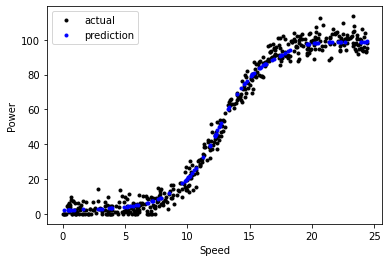

In [16]:
# Let's plot our predictions of the x values we trained on
plt.plot(X, y, 'k.', label='actual')
plt.plot(X_test, model.predict(X_test), 'b.', label='prediction')
plt.legend();
plt.xlabel("Speed")
plt.ylabel("Power")

<br>
https://keras.io/examples/vision/mnist_convnet/

***

# End